In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **libraries**


In [2]:
import numpy as np
import time
import random
import statistics as sts
from scipy.stats.mstats import gmean
from scipy import stats

import tensorflow as tf
from tensorflow.keras import backend as Bkd
from tensorflow.keras.layers import Lambda

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Conv1D,Flatten, MaxPool1D, GRU, BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam, SGD
from tensorflow.keras import backend as K
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.compat.v1.random import set_random_seed

import math

from sklearn.preprocessing import MinMaxScaler

from keras.layers import TimeDistributed
from keras.backend import sigmoid

from keras.models import Sequential


from keras.layers import TimeDistributed

from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K
from scipy import stats
import statistics as sts
from scipy.stats.mstats import gmean
from keras.layers import concatenate
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

plt.style.use('fivethirtyeight')

In [3]:
WIND = 70
BATCH = 40
EPOCH = 40
activation=['tanh']

In [4]:
print('-------------------------------------------------')
print('Window size = ',WIND)
print('Batch  size = ',BATCH)
print('Epochs      = ',EPOCH)
print('-------------------------------------------------')

-------------------------------------------------
Window size =  70
Batch  size =  40
Epochs      =  40
-------------------------------------------------


# **dataSets, EUR/USD on 30 minutes, 15 minutes, 1 hour**

In [5]:
#/content/drive/MyDrive/EUR-USD/H_1/EURUSD_Candlestick_1_Hour_ASK_01.01.2015-31.12.2020.csv
#/content/drive/MyDrive/EUR-USD/H_1/EURUSD_Candlestick_1_Hour_BID_01.01.2015-14.09.2021.csv
#/content/drive/MyDrive/EUR-USD/H_1/EURUSD_Candlestick_1_Hour_BID_01.01.2015-31.12.2020.csv

In [6]:
df_M_15 = pd.read_csv('/content/drive/MyDrive/EUR-USD/M_15/M_15_EUR_USD.csv',index_col=0)[157919:210528]

df_M_30 = pd.read_csv('/content/drive/MyDrive/EUR-USD/M_30/M_30_EUR_USD.csv',index_col=0)[52655:105264]

df_H_1 = pd.read_csv('/content/drive/MyDrive/EUR-USD/H_1/EURUSD_Candlestick_1_Hour_BID_01.01.2015-31.12.2020.csv',index_col=0)

In [7]:
print(len(df_M_15))
print(len(df_M_30))
print(len(df_H_1))

52609
52609
52609


In [8]:
print(df_M_15)
print('----------------------------------------------------------------------------------------------------------------')
print(df_M_30)
print('----------------------------------------------------------------------------------------------------------------')
print(df_H_1)

                              Local time     Open     High      Low    Close  \
52703   03.07.2019 00:45:00.000 GMT+0430  1.12852  1.12863  1.12849  1.12852   
52704   03.07.2019 01:00:00.000 GMT+0430  1.12852  1.12887  1.12847  1.12882   
52705   03.07.2019 01:15:00.000 GMT+0430  1.12883  1.12884  1.12843  1.12847   
52706   03.07.2019 01:30:00.000 GMT+0430  1.12842  1.12886  1.12839  1.12875   
52707   03.07.2019 01:45:00.000 GMT+0430  1.12876  1.12897  1.12835  1.12880   
...                                  ...      ...      ...      ...      ...   
105307  31.12.2020 22:45:00.000 GMT+0330  1.22179  1.22199  1.22169  1.22194   
105308  31.12.2020 23:00:00.000 GMT+0330  1.22194  1.22228  1.22190  1.22219   
105309  31.12.2020 23:15:00.000 GMT+0330  1.22217  1.22217  1.22091  1.22098   
105310  31.12.2020 23:30:00.000 GMT+0330  1.22096  1.22158  1.22096  1.22143   
105311  31.12.2020 23:45:00.000 GMT+0330  1.22143  1.22167  1.22140  1.22154   

         Volume  
52703    991.81  
527

In [9]:
df_M_15 = df_M_15.drop(columns='Local time')

In [10]:
df_M_30 = df_M_30.drop(columns='Local time')

In [11]:
#df_H_1 = df_H_1.drop(columns='Local time')

In [12]:
df_M_15 = df_M_15.drop(columns='Volume')

In [13]:
df_M_30 = df_M_30.drop(columns='Volume')

In [14]:
df_H_1 = df_H_1.drop(columns='Volume')

In [15]:
print(df_M_15)
print('----------------------------------------------------------------------------------------------------------------')
print(df_M_30)
print('----------------------------------------------------------------------------------------------------------------')
print(df_H_1)

           Open     High      Low    Close
52703   1.12852  1.12863  1.12849  1.12852
52704   1.12852  1.12887  1.12847  1.12882
52705   1.12883  1.12884  1.12843  1.12847
52706   1.12842  1.12886  1.12839  1.12875
52707   1.12876  1.12897  1.12835  1.12880
...         ...      ...      ...      ...
105307  1.22179  1.22199  1.22169  1.22194
105308  1.22194  1.22228  1.22190  1.22219
105309  1.22217  1.22217  1.22091  1.22098
105310  1.22096  1.22158  1.22096  1.22143
105311  1.22143  1.22167  1.22140  1.22154

[52609 rows x 4 columns]
----------------------------------------------------------------------------------------------------------------
          Open     High      Low    Close
47     1.19985  1.19985  1.19985  1.19985
48     1.19985  1.19985  1.19985  1.19985
49     1.19985  1.19985  1.19985  1.19985
50     1.19985  1.19985  1.19985  1.19985
51     1.19985  1.19985  1.19985  1.19985
...        ...      ...      ...      ...
52651  1.22251  1.22279  1.22180  1.22222
52652  1.

In [ ]:
print(df_M_15)
print('----------------------------------------------------------------------------------------------------------------')
print(df_M_30)
print('----------------------------------------------------------------------------------------------------------------')
print(df_H_1)

           Open     High      Low    Close
52703   1.12852  1.12863  1.12849  1.12852
52704   1.12852  1.12887  1.12847  1.12882
52705   1.12883  1.12884  1.12843  1.12847
52706   1.12842  1.12886  1.12839  1.12875
52707   1.12876  1.12897  1.12835  1.12880
...         ...      ...      ...      ...
105307  1.22179  1.22199  1.22169  1.22194
105308  1.22194  1.22228  1.22190  1.22219
105309  1.22217  1.22217  1.22091  1.22098
105310  1.22096  1.22158  1.22096  1.22143
105311  1.22143  1.22167  1.22140  1.22154

[52609 rows x 4 columns]
----------------------------------------------------------------------------------------------------------------
          Open     High      Low    Close
47     1.19985  1.19985  1.19985  1.19985
48     1.19985  1.19985  1.19985  1.19985
49     1.19985  1.19985  1.19985  1.19985
50     1.19985  1.19985  1.19985  1.19985
51     1.19985  1.19985  1.19985  1.19985
...        ...      ...      ...      ...
52651  1.22251  1.22279  1.22180  1.22222
52652  1.

# **Split**

In [ ]:
trainsize_15=int(len(df_M_15)*0.8)
testsize_15=len(df_M_15)-trainsize_15

trainsize_30=int(len(df_M_30)*0.8)
testsize_30=len(df_M_30)-trainsize_30

trainsize_1=int(len(df_H_1)*0.8)
testsize_1=len(df_H_1)-trainsize_1

In [ ]:
Total_len_15 = len(df_M_15)
Train_len_15 = Total_len_15 - testsize_15
Test_len_15 = Total_len_15 - Train_len_15
Train_15 = df_M_15.head(n = Train_len_15)
Test_15 = df_M_15.tail(n = Test_len_15)

Total_len_30 = len(df_M_30)
Train_len_30 = Total_len_30 - testsize_30
Test_len_30 = Total_len_30 - Train_len_30
Train_30 = df_M_30.head(n = Train_len_30)
Test_30 = df_M_30.tail(n = Test_len_30)

Total_len_1 = len(df_H_1)
Train_len_1 = Total_len_1 - testsize_1
Test_len_1 = Total_len_1 - Train_len_1
Train_1 = df_H_1.head(n = Train_len_1)
Test_1 = df_H_1.tail(n = Test_len_1)

In [ ]:
print(Train_30)
print(Test_30)

          Open     High      Low    Close
47     1.19985  1.19985  1.19985  1.19985
48     1.19985  1.19985  1.19985  1.19985
49     1.19985  1.19985  1.19985  1.19985
50     1.19985  1.19985  1.19985  1.19985
51     1.19985  1.19985  1.19985  1.19985
...        ...      ...      ...      ...
42129  1.09706  1.09769  1.09640  1.09697
42130  1.09700  1.09801  1.09671  1.09794
42131  1.09793  1.09869  1.09729  1.09732
42132  1.09733  1.09898  1.09725  1.09867
42133  1.09868  1.09917  1.09781  1.09787

[42087 rows x 4 columns]
          Open     High      Low    Close
42134  1.09787  1.09794  1.09689  1.09692
42135  1.09692  1.09719  1.09678  1.09685
42136  1.09684  1.09767  1.09684  1.09763
42137  1.09764  1.09847  1.09704  1.09811
42138  1.09811  1.09824  1.09770  1.09789
...        ...      ...      ...      ...
52651  1.22251  1.22279  1.22180  1.22222
52652  1.22221  1.22221  1.22149  1.22166
52653  1.22166  1.22199  1.22101  1.22194
52654  1.22194  1.22228  1.22091  1.22098
52655  1

In [ ]:
print(len(Train_30))

print(len(Test_30))

42087
10522


# **Parameters**

In [ ]:
P_15 = ((Train_15[Train_15.columns[0]] + Train_15[Train_15.columns[1]] + Train_15[Train_15.columns[2]] + Train_15[Train_15.columns[3]]))

P_30 = ((Train_30[Train_30.columns[0]] + Train_30[Train_30.columns[1]] + Train_30[Train_30.columns[2]] + Train_30[Train_30.columns[3]]))

P_1 = ((Train_1[Train_1.columns[0]] + Train_1[Train_1.columns[1]] + Train_1[Train_1.columns[2]] + Train_1[Train_1.columns[3]]))

In [ ]:
P1_15 = np.array(P_15)

P1_30 = np.array(P_30)

P1_1 = np.array(P_1)

In [ ]:
m_15 = stats.mode(P1_15)
print(m_15)
print('----------------------------------------------------------')
m_30 = stats.mode(P1_30)
print(m_30)
print('----------------------------------------------------------')
m_1 = stats.mode(P1_1)
print(m_1)


ModeResult(mode=array([1.07955]), count=array([197]))
----------------------------------------------------------
ModeResult(mode=array([1.0976]), count=array([100]))
----------------------------------------------------------
ModeResult(mode=array([1.08818]), count=array([96]))


<ipython-input-23-70ee9890b4d9>:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m_15 = stats.mode(P1_15)
<ipython-input-23-70ee9890b4d9>:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  m_30 = stats.mode(P1_30)
<ipython-input-23-70ee9890b4d9>:7: FutureWarning: Un

In [ ]:
MODE_15 = 1.07955
H_MEAN_15 = sts.harmonic_mean(P_15)
VAR_15 = sts.stdev(P_15)
Train_Min_15 = min(Train_15.min())
Train_Max_15 = max(Train_15.max())
print('mode= ', MODE_15)
print('min = ', Train_Min_15)
print('Max = ', Train_Max_15)
print('Harmonic Avg. = ', H_MEAN_15)
print('Geometric Mean = ', G_MEAN_15)

MODE_30 = 1.0976
H_MEAN_30 = sts.harmonic_mean(P_30)
VAR_30 = sts.stdev(P_30)
Train_Min_30 = min(Train_30.min())
Train_Max_30 = max(Train_30.max())
print('mode= ', MODE_30)
print('min = ', Train_Min_30)
print('Max = ', Train_Max_30)
print('Harmonic Avg. = ', H_MEAN_30)
print('Geometric Mean = ', G_MEAN_30)

MODE_1 = 1.08818
H_MEAN_1 = sts.harmonic_mean(P_1)
VAR_1 = sts.stdev(P_1)
Train_Min_1 = min(Train_1.min())
Train_Max_1 = max(Train_1.max())
print('mode= ', MODE_1)
print('min = ', Train_Min_1)
print('Max = ', Train_Max_1)
print('Harmonic Avg. = ', H_MEAN_1)
print('Geometric Mean = ', G_MEAN_1)


mode=  1.07955
min =  1.06357
Max =  1.20113
Harmonic Avg. =  1.1153159271102946
Geometric Mean =  1.1156528577066471
mode=  1.0976
min =  1.06357
Max =  1.25553
Harmonic Avg. =  1.139732073437345
Geometric Mean =  1.1405124394423276
mode=  1.08818
min =  1.03403
Max =  1.25553
Harmonic Avg. =  1.1286383173514027
Geometric Mean =  1.1294664589016936


# **Normalization**

In [ ]:
ColList=range(4)
ColList = list(ColList)

In [ ]:
DF_std_15 = Train_15.copy()
DF_temp_15 = (Train_15.iloc[:, ColList] - H_MEAN_15) / (Train_Max_15 - Train_Min_15)
DF_std_15[ColList] = DF_temp_15
Train_std_15 = DF_std_15[ColList]

DF_std_30 = Train_30.copy()
DF_temp_30 = (Train_30.iloc[:, ColList] - H_MEAN_30) / (Train_Max_30 - Train_Min_30)
DF_std_30[ColList] = DF_temp_30
Train_std_30 = DF_std_30[ColList]

DF_std_1 = Train_1.copy()
DF_temp_1 = (Train_1.iloc[:, ColList] - H_MEAN_1) / (Train_Max_1 - Train_Min_1)
DF_std_1[ColList] = DF_temp_1
Train_std_1 = DF_std_1[ColList]


In [ ]:
DF_std_15 = Test_15.copy()
DF_temp_15 = (Test_15.iloc[:, ColList] - H_MEAN_15) / (Train_Max_15 - Train_Min_15)
DF_std_15[ColList] = DF_temp_15
Test_std_15 = DF_std_15[ColList]

DF_std_30 = Test_30.copy()
DF_temp_30 = (Test_30.iloc[:, ColList] - H_MEAN_30) / (Train_Max_30 - Train_Min_30)
DF_std_30[ColList] = DF_temp_30
Test_std_30 = DF_std_30[ColList]

DF_std_1 = Test_1.copy()
DF_temp_1 = (Test_1.iloc[:, ColList] - H_MEAN_1) / (Train_Max_1 - Train_Min_1)
DF_std_1[ColList] = DF_temp_1
Test_std_1 = DF_std_1[ColList]


In [ ]:
Train_std_15

,0,1,2,3
52703,0.095988,0.096787,0.095770,0.095988
52704,0.095988,0.098532,0.095624,0.098169
52705,0.098241,0.098314,0.095333,0.095624
52706,0.095261,0.098459,0.095043,0.097660
52707,0.097732,0.099259,0.094752,0.098023
...,...,...,...,...
94785,0.503156,0.503156,0.503156,0.503156
94786,0.503156,0.503156,0.503156,0.503156
94787,0.503156,0.503156,0.503156,0.503156
94788,0.503156,0.503156,0.503156,0.503156


In [ ]:
Train_MinMax_15 = Train_std_15 * (Train_Max_15 - Train_Min_15) + H_MEAN_15

Train_MinMax_30 = Train_std_30 * (Train_Max_30 - Train_Min_30) + H_MEAN_30

Train_MinMax_1 = Train_std_1 * (Train_Max_1 - Train_Min_1) + H_MEAN_1

In [ ]:
print(Train_std_30)
print('----------------------------------------------------------------------------------------------------------------')
print(Test_std_30)
print('----------------------------------------------------------------------------------------------------------------')

              0         1         2         3
47     0.313179  0.313179  0.313179  0.313179
48     0.313179  0.313179  0.313179  0.313179
49     0.313179  0.313179  0.313179  0.313179
50     0.313179  0.313179  0.313179  0.313179
51     0.313179  0.313179  0.313179  0.313179
...         ...       ...       ...       ...
42129 -0.222297 -0.219015 -0.225735 -0.222766
42130 -0.222609 -0.217348 -0.224120 -0.217712
42131 -0.217765 -0.213805 -0.221099 -0.220942
42132 -0.220890 -0.212295 -0.221307 -0.213910
42133 -0.213857 -0.211305 -0.218390 -0.218077

[42087 rows x 4 columns]
----------------------------------------------------------------------------------------------------------------
              0         1         2         3
42134 -0.218077 -0.217712 -0.223182 -0.223026
42135 -0.223026 -0.221619 -0.223755 -0.223391
42136 -0.223443 -0.219119 -0.223443 -0.219327
42137 -0.219275 -0.214951 -0.222401 -0.216827
42138 -0.216827 -0.216150 -0.218963 -0.217973
...         ...       ...       .

In [ ]:
Test_std_30

,0,1,2,3
42134,-0.218077,-0.217712,-0.223182,-0.223026
42135,-0.223026,-0.221619,-0.223755,-0.223391
42136,-0.223443,-0.219119,-0.223443,-0.219327
42137,-0.219275,-0.214951,-0.222401,-0.216827
42138,-0.216827,-0.216150,-0.218963,-0.217973
...,...,...,...,...
52651,0.431225,0.432684,0.427526,0.429714
52652,0.429662,0.429662,0.425911,0.426797
52653,0.426797,0.428516,0.423411,0.428256
52654,0.428256,0.430027,0.422890,0.423254


# **3 D data**

In [ ]:
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step), :]
        dataX.append(a)
        dataY.append(dataset[i+time_step, :])
    return np.array(dataX), np.array(dataY)

In [ ]:
Train_std_15 = np.array(Train_std_15)
Test_std_15 = np.array(Test_std_15)

Train_std_30 = np.array(Train_std_30)
Test_std_30 = np.array(Test_std_30)

Train_std_1 = np.array(Train_std_1)
Test_std_1 = np.array(Test_std_1)

In [ ]:
xtrain_15, ytrain_15 = create_dataset(Train_std_15, WIND)
xtrain_30, ytrain_30 = create_dataset(Train_std_30, WIND)
xtrain_1, ytrain_1 = create_dataset(Train_std_1, WIND)

In [ ]:
xtrain_15.shape

(42017, 70, 4)

In [ ]:
xtest_15, ytest_15 = create_dataset(Test_std_15, WIND)
xtest_30, ytest_30 = create_dataset(Test_std_30, WIND)
xtest_1, ytest_1 = create_dataset(Test_std_1, WIND)

In [ ]:
#xtrain_15 = tf.random.shuffle(xtrain_15, seed=None, name=None)

In [ ]:
def tf_shuffle_axis(value, axis=0, seed=None, name=None):
    perm = list(range(tf.rank(value)))
    perm[axis], perm[0] = perm[0], perm[axis]
    value = tf.random.shuffle(tf.transpose(value, perm=perm))
    value = tf.transpose(value, perm=perm)
    return value

In [ ]:
#xtrain_15 = tf_shuffle_axis(xtrain_15, axis=0, seed=None, name=None)

In [ ]:
#xtrain_30 = tf_shuffle_axis(xtrain_30, axis=0, seed=None, name=None)
#xtrain_1 = tf_shuffle_axis(xtrain_1, axis=0, seed=None, name=None)

In [ ]:
xtest_15 = xtest_15[:450]
ytest_15 = ytest_15[:450]

xtest_30 = xtest_30[:450]
ytest_30 = ytest_30[:450]

xtest_1 = xtest_1[:450]
ytest_1 = ytest_1[:450]

In [ ]:
xtrain_15.shape

(42017, 70, 4)

# **swish activation function**

In [ ]:
#def swish(x, beta = 1):
#   return (x * sigmoid(beta * x))
#from keras.utils.generic_utils import get_custom_objects
#from keras.layers import Activation
#get_custom_objects().update({'swish': Activation(swish)})

# **FLF loss function**

In [ ]:
def FLF(yTrue, yPred):

  lam = 0.1
  v   = Lambda(lambda x: x*0.9)((yTrue-yPred))
  vn  = Lambda(lambda x: x*lam)(K.abs((yTrue[:,1]+yTrue[:,2])/2 - (yPred[:,1]+yPred[:,2])/2))
  vn1 = Lambda(lambda x: x*lam)(K.abs((yTrue[:,0]+yTrue[:,3])/2 - (yPred[:,0]+yPred[:,3])/2))
  vx  = K.square((v[:,0]-vn1))
  vy  = K.square((v[:,1]-vn))
  vz  = K.square((v[:,2]-vn))
  v4  = K.square((v[:,3]-vn1))
  vm  = K.concatenate([vx, vy, vz, v4])
  vmx = K.mean(vm)
  return vmx

In [ ]:
print(xtrain_15.shape)

print(xtrain_30.shape)

print(xtrain_1.shape)

print(ytrain_15.shape)

print(ytrain_30.shape)

print(ytrain_1.shape)

(42017, 70, 4)
(42017, 70, 4)
(42017, 70, 4)
(42017, 4)
(42017, 4)
(42017, 4)


# **Validation Set**

In [ ]:
X = xtrain_15[37814:,:,:]
Y = ytrain_15[37814:,:]

X1 = xtrain_30[37814:,:,:]
Y1 = ytrain_30[37814:,:]

X2 = xtrain_1[37814:,:,:]
Y2 = ytrain_1[37814:,:]

In [ ]:
X.shape

(4203, 70, 4)

In [ ]:
# Define the shape of input tensors
input_shape_15 = xtrain_15.shape[1:]
input_shape_30 = xtrain_30.shape[1:]
input_shape_1 = xtrain_1.shape[1:]

In [ ]:
from keras.layers import Input, Conv1D, Flatten, concatenate, Dense
from keras.models import Model
from keras.optimizers import Nadam

# **Neural Network**

In [ ]:
inp1 = Input(shape=input_shape_15)
inp2 = Input(shape=input_shape_30)
inp3 = Input(shape=input_shape_1)

x = Conv1D(256, 2, activation='tanh',padding='same')(inp1)
x = Conv1D(128, 2, activation='tanh',padding= 'same')(x)
x = Flatten()(x)


y = Conv1D(256, 2,activation='tanh',padding='same')(inp2)
y = Conv1D(128, 2, activation='tanh',padding= 'same')(y)
y = Flatten()(y)


g = Conv1D(256, 2, activation='tanh',padding='same')(inp3)
g = Conv1D(128, 2, activation='tanh',padding= 'same')(g)
g = Flatten()(g)



In [ ]:
w = concatenate([x, y, g])
out_cnn =  Dense(4, activation='linear')(w)



model_cnn = keras.Model(inputs=[inp1, inp2, inp3], outputs=out_cnn)

In [ ]:
print(model_cnn.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 70, 4)]      0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 70, 4)]      0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 70, 4)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 70, 256)      2304        ['input_1[0][0]']                
                                                                                              

In [ ]:
model_cnn.compile(loss=FLF, optimizer = Nadam(learning_rate=0.00001, beta_1=0.8, beta_2=0.099, epsilon=None, schedule_decay=0.0004))

In [ ]:
import time

start = time.time()
history_cnn = model_cnn.fit([xtrain_15, xtrain_30, xtrain_1], ytrain_30, epochs=100, validation_data=([X,X1,X2],Y1), batch_size=BATCH, verbose=1, shuffle=False)

train_loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

for epoch in range(len(train_loss)):
    print("Epoch:", epoch + 1)
    print("Training Loss:", train_loss[epoch])
    print("Validation Loss:", val_loss[epoch])
    print("------------------------------")

print("Total time:", time.time() - start, "seconds")


Epoch 1/100
1051/1051 [==============================] - 19s 8ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 2/100
1051/1051 [==============================] - 7s 6ms/step - loss: 4.0475e-04 - val_loss: 0.0010
Epoch 3/100
1051/1051 [==============================] - 7s 7ms/step - loss: 2.2120e-04 - val_loss: 8.6119e-04
Epoch 4/100
1051/1051 [==============================] - 7s 7ms/step - loss: 2.1843e-04 - val_loss: 7.7373e-04
Epoch 5/100
1051/1051 [==============================] - 9s 9ms/step - loss: 1.7845e-04 - val_loss: 5.1618e-04
Epoch 6/100
1051/1051 [==============================] - 7s 7ms/step - loss: 6.8441e-05 - val_loss: 2.9510e-04
Epoch 7/100
1051/1051 [==============================] - 7s 6ms/step - loss: 2.7146e-05 - val_loss: 1.6041e-04
Epoch 8/100
1051/1051 [==============================] - 8s 7ms/step - loss: 1.9784e-05 - val_loss: 1.1123e-04
Epoch 9/100
1051/1051 [==============================] - 7s 6ms/step - loss: 1.5286e-05 - val_loss: 5.4000e-05
Epoch 10/100

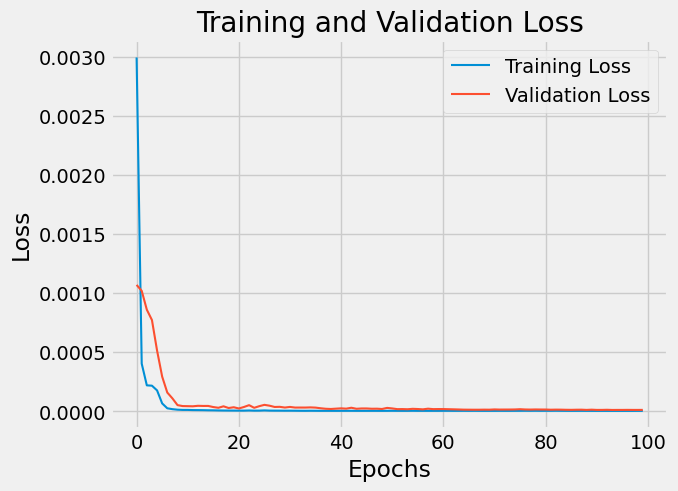

In [ ]:
import matplotlib.pyplot as plt

history = history_cnn.history  # Assuming `history_cnn` contains the training history
train_loss_values = history['loss']
val_loss_values = history['val_loss']


plt.plot(train_loss_values, label='Training Loss', linewidth=1.5)
plt.plot(val_loss_values, label='Validation Loss', linewidth=1.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
test_pred_cnn= model_cnn.predict([xtest_15,xtest_30,xtest_1])


15/15 [==============================] - 0s 8ms/step


In [ ]:
test_pred_cnn = model_cnn.predict([xtest_15, xtest_30, xtest_1])

15/15 [==============================] - 0s 2ms/step


In [ ]:
test_pred_cnn.shape

(450, 4)

In [ ]:
accuracy_cnn=model_cnn.evaluate([xtest_15,xtest_30,xtest_1], ytest_30)
print(accuracy_cnn)


15/15 [==============================] - 0s 3ms/step - loss: 1.1012e-05
1.1011690730811097e-05


In [ ]:
ytest_rescale = ytest_30 * (Train_Max_30 - Train_Min_30) + H_MEAN_30

In [ ]:
Test_Pred_cnn = test_pred_cnn * (Train_Max_30 - Train_Min_30) + H_MEAN_30

In [ ]:
print(df_M_15.shape)
print(df_M_30.shape)
print(ytest_30.shape)
print(Test_Pred_cnn.shape)

(52609, 4)
(52609, 4)
(52609, 4)
(450, 4)
(450, 4)


In [ ]:
Test_MinMax_30

,0,1,2,3
0,1.09787,1.09794,1.09689,1.09692
1,1.09692,1.09719,1.09678,1.09685
2,1.09684,1.09767,1.09684,1.09763
3,1.09764,1.09847,1.09704,1.09811
4,1.09811,1.09824,1.09770,1.09789
...,...,...,...,...
10517,1.22251,1.22279,1.22180,1.22222
10518,1.22221,1.22221,1.22149,1.22166
10519,1.22166,1.22199,1.22101,1.22194
10520,1.22194,1.22228,1.22091,1.22098


# **Plot**

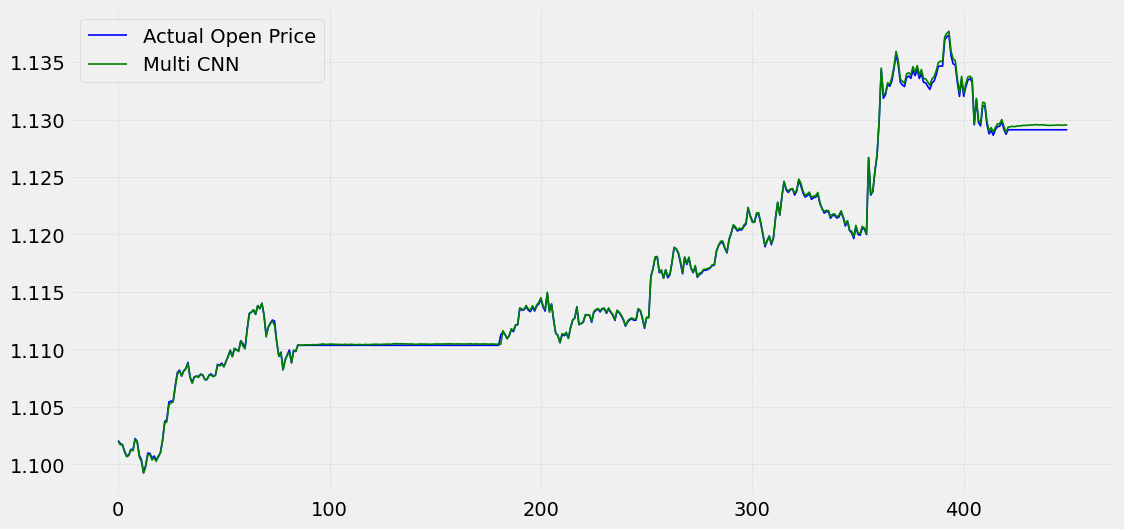

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(ytest_rescale[(len(ytest_rescale)-450):,0],'blue', linewidth=1.2)
plt.plot(Test_Pred_cnn[(len(Test_Pred_cnn)-450):,0],'green', linewidth=1.2)
#plt.plot(Test_Pred_lstm[(len(Test_Pred_lstm)-90):,0],'g')
plt.legend(('Actual Open Price', 'Multi CNN'), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
#plt.title("HIGH EURUSD + multi-CNN")
plt.show()

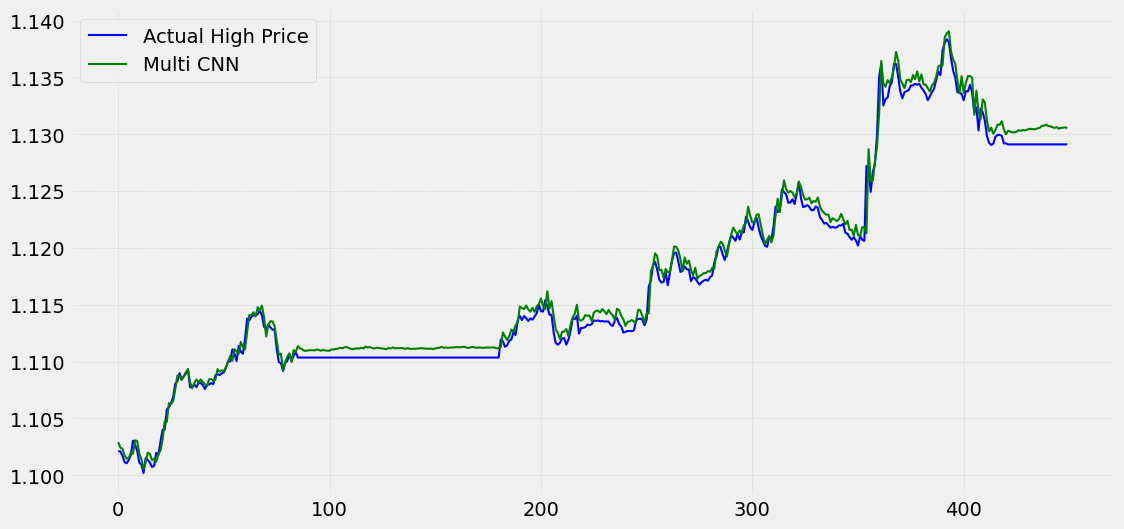

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(ytest_rescale[(len(ytest_rescale)-450):,1],'blue', linewidth=1.5)
plt.plot(Test_Pred_cnn[(len(Test_Pred_cnn)-450):,1],'green', linewidth=1.5)
#plt.plot(Test_Pred_lstm[(len(Test_Pred_lstm)-90):,1],'g')
plt.legend(('Actual High Price', 'Multi CNN'), loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
#plt.title("HIGH EURUSD + multi-CNN")
plt.show()

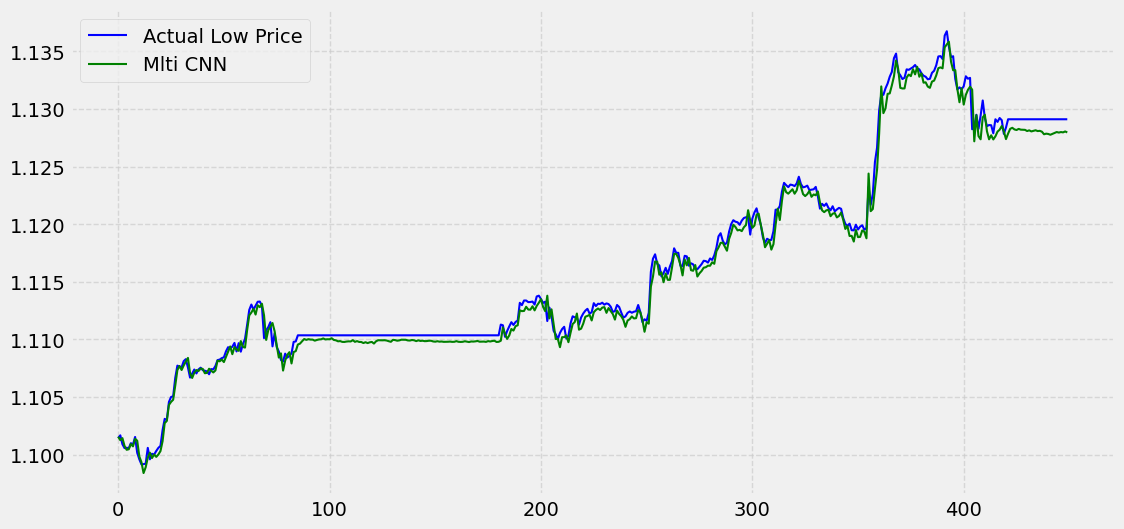

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ytest_rescale[(len(ytest_rescale)-450):,2],'blue', linewidth=1.5)
plt.plot(Test_Pred_cnn[(len(Test_Pred_cnn)-450):,2],'green', linewidth=1.5)
#plt.plot(Test_Pred_lstm[(len(Test_Pred_lstm)-90):,2],'g')
plt.legend(('Actual Low Price', 'Mlti CNN'), loc='upper left')
plt.grid(True, linestyle='--', linewidth=1, alpha=0.7)
#plt.title("LOW EURUSD + multi-CNN 30")
plt.show()

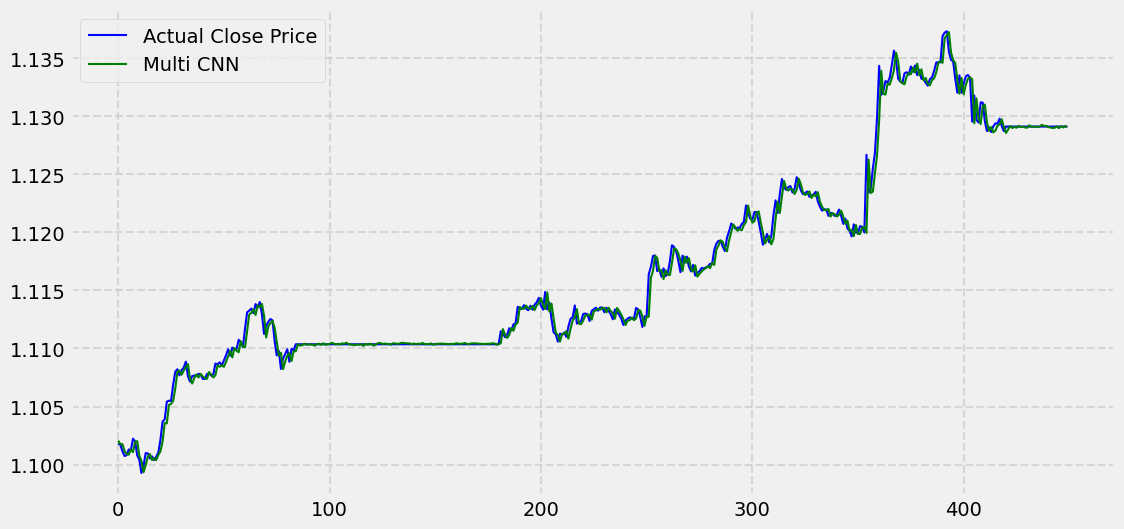

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(ytest_rescale[(len(ytest_rescale)-450):,3],'blue',linewidth=1.5)
plt.plot(Test_Pred_cnn[(len(Test_Pred_cnn)-450):,3],'green',linewidth=1.5)
#plt.plot(Test_Pred_lstm[(len(Test_Pred_lstm)-90):,3],'g')
plt.legend(('Actual Close Price', 'Multi CNN'), loc='upper left')
plt.grid(True, linestyle='--', linewidth=1.5, alpha=0.7)
#plt.title("CLOSE EURUSD + multi-CNN ")
plt.show()